In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [29]:
df = pd.read_csv('final.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,date,lat,lon,mask,lst,ndvi,vcr,ma_cat
0,2019-06-02,39.737500,-122.295833,9.0,310.260000,0.3108,59.0,1
1,2019-06-10,39.737500,-122.295833,5.0,323.920000,0.2526,59.0,0
2,2019-06-18,39.737500,-122.295833,5.0,309.667256,0.2526,59.0,0
3,2019-06-02,39.729167,-122.295833,9.0,310.360000,0.3198,57.0,1
4,2019-06-10,39.729167,-122.295833,5.0,321.900000,0.2670,57.0,0


In [30]:
df['ma_cat'].value_counts()

0    1931
1     109
Name: ma_cat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274BEFC05F8>]],
      dtype=object)

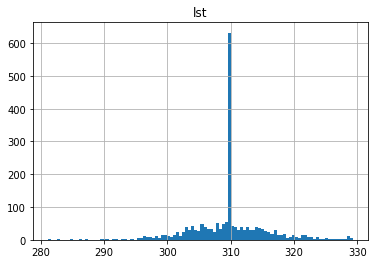

In [31]:
df.hist(column='lst', bins=100)

In [32]:
def cal_avg(a):
    avg = a.astype("float").mean(axis=0)
    return avg

In [33]:
df['lst'].replace(np.nan, cal_avg(df['lst']), inplace=True)
df['ndvi'].replace(np.nan, cal_avg(df['ndvi']), inplace=True)
df['vcr'].replace(np.nan, cal_avg(df['vcr']), inplace=True)

In [34]:
X = df[['vcr', 'lst','ndvi']] .values  #.astype(float)
X[0:5]

array([[5.90000000e+01, 3.10260000e+02, 3.10800000e-01],
       [5.90000000e+01, 3.23920000e+02, 2.52600000e-01],
       [5.90000000e+01, 3.09667256e+02, 2.52600000e-01],
       [5.70000000e+01, 3.10360000e+02, 3.19800000e-01],
       [5.70000000e+01, 3.21900000e+02, 2.67000000e-01]])

In [35]:
y = df['ma_cat'].values
y[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [36]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-2.25291503e-01,  1.00464525e-01, -6.59172527e-01],
       [-2.25291503e-01,  2.41570691e+00, -9.93849358e-01],
       [-2.25291503e-01, -2.89032853e-14, -9.93849358e-01],
       [-3.20048104e-01,  1.17413591e-01, -6.07418378e-01],
       [-3.20048104e-01,  2.07333578e+00, -9.11042719e-01]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1632, 3) (1632,)
Test set: (408, 3) (408,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [40]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [41]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9503676470588235
Test set Accuracy:  0.9509803921568627


In [26]:
yhat.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [42]:
import collections
ctr = collections.Counter(yhat)
ctr

Counter({0: 404, 1: 4})

In [43]:
ctr = collections.Counter(y_test)
ctr

Counter({0: 388, 1: 20})